# Geopandas

**GeoPandas** es una librería que brinda soporte para la visualización datos geográficos usando **Pandas**. Implementa dos tipos de datos derivados de **pandas.Series** y **pandas.DataFrame** (**GeoSeries** y **GeoDataFrame** respectivamente). Las operaciones geométricas soportadas por **Geopandas** son cartesianas. 

Inicialmente debemos instalar los paquete **geopandas** y **libspatialindex-dev**, también se debe instalar el paquete **descartes** ya que se requiere para algunas diagramaciones:

In [0]:
!sudo apt install libspatialindex-dev
!pip install geopandas
!pip install descartes

**gpd.read_file** permite la carga de conjuntos de datos a través de la libería **fiona**. **Fiona** soporta una gran cantidad de formatos, entre ellos **GeoJSON**. 

In [81]:
!pip install Fiona==1.8.4
!apt-get install ca-certificates

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ca-certificates is already the newest version (20180409).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


Es necesario instalar el paquete **pysal** y **mapclassify** para que el siguiente ejemplo funcione, ya que es usado al momento de generar el diagrama:

In [82]:
!pip install pysal==1.14.4.post2
!pip install mapclassify==2.0.1

La función **sjoin** hace uso del paquete **rtree**, por lo que debemos instalarlo antes del llamado a la función:

In [83]:
!pip install rtree

Importamos las librerias habituales **numpy**, **matplotlib.pyplot** y **pandas**. Adicionalmente cargamos otras para manejo de datos georeferenciado como  **geopandas**,   **ogr**, **shapely**, y establecemos **matplotlib inline** para poder visualizar las gráficas de manera directa en el notebook::

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import IPython.display as display
import ogr                           # GDAL/OGR
import shapely                       # Herramientas para manipulación geométrica
from shapely.geometry import *

%matplotlib inline

Listamos todas las librerías del notebook para comprobar las versiones de las librerias previamente instaladas:


In [0]:
!pip list

In [0]:
!pip freeze

##1. GeoSerie

Una **GeoSerie** es básicamente un arreglo en el cual cada entrada es un objeto de tipo figura geométrica. La entrada puede consistir de un único objeto geométrico (un poligono por ejemplo) o de multiples objetos geométricos (las cuales en general deben ser del mismo tipo).

`Geopandas` soporta los siguientes tipos de objetos geométricos:

- Points / Multi-Points 
- Lines / Multi-Lines 
- Polygons / Multi-Polygons 

Cada uno de estos objetos son a su vez objetos de la librería `shapely`

[Documentación](https://shapely.readthedocs.io/en/latest/manual.html#geometric-objects)




Para entender el funcionamiento de una **geoserie**, lo ilustraremos con el ejemplo más sencillo. Definimos inicialmente una figura geométrica **p1** del tipo **Poligon**, la cual es definida mediante la serie de puntos en el plano cartesiano que dan forma al polígono, seguidamente se define la **geoserie** enviando en este caso un único parametro el cual es el objeto o figura que deseamos dibujar, que para este ejemplo es el poligono previamente definido:

In [0]:
p1 = Polygon([(0, 0), (0.5, 0.2), (1, 0), (0.8, 0.5), (1, 1), (0.1, 0.8)])

g = gpd.GeoSeries(p1)


In [88]:
type(g)

geopandas.geoseries.GeoSeries

Ya definida la **geoserie**, la podemos dibujar con el llamado a la función **plot()**, la cual nos dibujará el poligono con el que se definió la **geoserie**

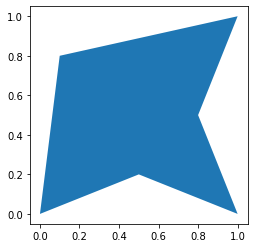

In [89]:
g.plot()

In [90]:
g

0    POLYGON ((0.00000 0.00000, 0.50000 0.20000, 1....
dtype: geometry

Podemos, como se dijo, definir la **geoserie** con más de un objeto geométrico, en el siguiente caso definimos tres objetos geométricos de tipo polígono y con ellos creamos la **geoserie** que posteriormente se diagrama. La función **plot()** puede recibir parametros para la personalización de la gráfica, en este caso por ejemplo definimos el mapa de colores a usar:

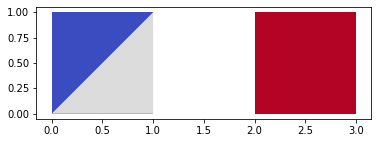

In [94]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = gpd.GeoSeries([p1, p2, p3])
g.plot(cmap='coolwarm')

In [92]:
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
dtype: geometry

De esta manera, es posible por ejemplo diagramar el mapa de una región geográfica, definiendo el poligono o conjunto de poligonos que le dan forma.

###Atributos

Las **geoseries** poseen ciertos atributos que permiten la obtención de algunas de sus características:



**area**: retorna el área proyectada de cada una de las figuras de la **geoserie**, con la siguiente línea de código obtenemos el área de las tres figuras que conforman la **geoserie**


In [95]:
g.area

0    1.0
1    0.5
2    1.0
dtype: float64

**bounds**: Define los limites de los ejes del plano cartesiano en los cuales se dibuja cada figura de la **geoserie**:

In [96]:
g.bounds

,minx,miny,maxx,maxy
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,2.0,0.0,3.0,1.0


**geom_type**: corresponde al tipo de figura geometrica de cada uno de los objetos geométricos que componen la **geoserie**, es este caso **Polygon**:


In [97]:
g.geom_type

0    Polygon
1    Polygon
2    Polygon
dtype: object

**centroid**: Retorna las coordenadas del centro de cada figura

In [98]:
g.centroid

0    POINT (0.50000 0.50000)
1    POINT (0.66667 0.33333)
2    POINT (2.50000 0.50000)
dtype: geometry

### Métodos básicos

**distance**: retorna la distancia mínima entre dos elementos u objetos geometricos, la forma de uso es **obj1.distance(obj2)**, el siguiente ejemplo retorna la distancia mínima que hay entre los polígonos **p1** y **p3**:

In [99]:
# Distancia entre elementos
print(p1.distance(p3))

1.0


El método **distance** también se puede llamar desde la **geoserie** y enviando como parámetro uno de los objetos de la **geoserie**, de esta manera nos retorna la distancia mínima entre cada uno de los objetos de la **geoserie**, y el objeto con el cual se llamó la función, en el ejemplo vemos la distancia mínima entre cada objeto de la **geoserie** y el objeto **p3**:

In [100]:
print(g.distance(p3))

0    1.0
1    1.0
2    0.0
dtype: float64


**representative_point**: retorna un punto representativo que se garantiza se encuentra dentro de la geometría

In [101]:
g.representative_point()

0    POINT (0.50000 0.50000)
1    POINT (0.75000 0.50000)
2    POINT (2.50000 0.50000)
dtype: geometry

**centroid.plot**: Diagrama en el plano cartesiano el **centroid** de cada figura geométrica que conforma la **geoserie**.

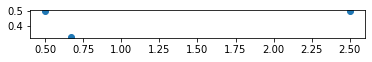

In [102]:
g.centroid.plot()

###Pruebas de relación

**geom_almost_equals**: Es una función de la **geoserie**, recibe como parámetro un objeto geométrico y retorna **True** o **False** dependiendo si hay o no semejanza geométrica entre cada uno de los objetos de la **geoserie** y el objeto enviado como parámetro, el siguiente código compara el objeto **p3** con cada uno de los objetos de la geoserie **g**:

In [0]:
g.geom_almost_equals(p3)

**contains**: Regresa verdadero si una figura está contenida en otra


In [0]:
p1.contains(p2)

In [0]:
p2.contains(p1)

**within:** devuelve verdadero si una geometría está dentro de otra.

In [0]:
p1.within(p2)

In [0]:
p2.within(p1)

**intersects**: Regresa verdadero si una figura está intersectada con otra

In [0]:
p2.intersects(p1)

In [0]:
p2

## 2. GeoDataFrame

Un **GeoDataFrame** es una estructura de datos tabular que contiene una columna de tipo **GeoSeries**. 

Los **GeoDataFrames** siempre contienen una columna que se denomina geometría (`geometry`). Cuando una operación espacial es aplicada al **GeoDataFrame**, este comando siempre actuará sobre la columna `geometry`. La columna `geometry` podría tener un nombre diferente, el cual puede ser consultado usando **gdf.geometry.name**.

A continuación se presenta un ejemplo usando **GeoDataFrame**:

Iniciamos leyendo el archivo: **naturalearth_lowres** con la funcion **read_file** del módulo **geopandas** y visualizando su contenido con la funcion **head()**:

In [0]:
path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path)
world.head()

La variable **world**  entonces apuntará a un **geodataframe** en el que la columna geometry representa el poligono correspondiente a cada país, por ejemplo, el elemento de la fila 35 para esta columna, corresponde al poligono que dibuja a Colombia, como vemos en la siguiente línea:

In [0]:
col = world[world['name']=='Colombia']['geometry']

In [0]:
col.plot()

y si llamamos a la función **plot()** desde el **geodataframe**, este se dibujará completo, (la diagramación de todos los poligonos de la columna geometry dará como resultado la gráfica de todos los paises en un solo diagrama):

In [0]:
world.plot()

In [0]:
world.plot(cmap='coolwarm')

**EJEMPLO:** Realizar el diagrama de los centroid de cada pais del mundo.

In [0]:
world.centroid.plot()

El nombre de la columna que contine los polígonos a dibujar, se puede obtener con el llamado al atributo **name** como se muestra en la siguinete línea de código, para este caso el nombre es igualmente geometry:

In [0]:
world.geometry.name

Es posible cambiar la columna que se usa para realizar el diagrama, para ello simplemete usamos la función **set_geometry()** enviando el nombre de la columna que queremos usar. para ejemplificar esto vamos a crear una nueva columna llamada **centroid_column** la cual contendra los **centroid** de cada poligono:

In [0]:
world['centroid_column'] = world.centroid
world.head()

Y ahora modificamos el valor **geometry** del geodataframe, para establecerlo con el nombre de la columna recien creada:

In [0]:
world = world.set_geometry('centroid_column')
print(world.geometry.name) 

De esta manera, al diagramar nuevamente el **geodataframe**, no se graficarán los poligonos, sino en cambio se dibujarán los correspondientes **centroid**

In [0]:
world.plot()

Adicionalmente nos permite hacer una selección de índices basado en coordenadas (`.cx`)

Para el ejemplo retomamos el **geodataframe** devuelto por **geopandas** con **naturalearth_lowres**:

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot()

Y creamos un nuevo **geodataframe** que corresponde a los paises úbicados en el hemisferio sur

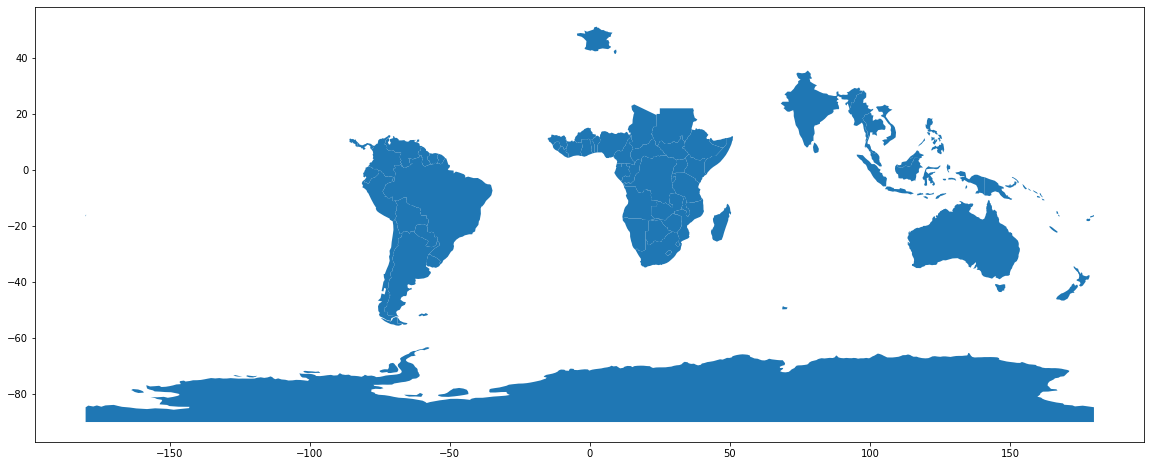

In [70]:
hemisferio_sur = world.cx[:, :10]

hemisferio_sur.plot(figsize=(20, 8));

### Otros datases de ejemplo

Podemos ver los **geodataframes** que están disponibles en **geopandas** mediante el llamado a **gpd.datasets.available**:

In [0]:
gpd.datasets.available

Entre ellos estan los geodataframes **naturalearth_cities**,  **naturalearth_lowres** y **nybb**, podemos entonces usar por ejemplo el geodataframe **nybb** para ver la información y diagrama correspondiente a New York:

## 3. Generando mapas

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

`GeoPandas` pinta los mapas usando matplotlib como soporte, por lo tanto cualquier atributo que se modifique en **pyplot**, tambien se puede modificar en **.plot**. Por ejemplo:

In [0]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title('El Mundo')

# Carga la configuración que hayamos generado en el elemento ax
world.plot(ax=ax)

# Eliminamos los ejes
ax.set_axis_off()


### Mapas coropléticos

Un **mapa coroplético** es un mapa en el cual las regiones se dibujan con diferentes tonos de color que van de acuerdo a cierta estádistica, como por ejemplo su población, rangos de ingreso, etc.

Para elaborar un mapa coroplético, basta con indicar la columna sobre la cual se van a clasificar los datos, de esta manera, la gráfica generada presentará distintos tonos de color para cada región, acordes con los valores que se tienen en la columna indicada.

Ahora generamos una nueva columna que llamaremos **gdp_per_cap**, la cual resulta de dividir el valor de la columna **gdp_md_est**, entre el valor de la columna **pop_est**:

In [0]:
world = world[(world['pop_est']>0) & (world['name']!="Antarctica")] # Eliminamos Antarctica
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est']
world.head()

Y finalmente se crea el mapa coroplético con base en el valor de la nueva columna creada:

In [0]:
world.plot(column='gdp_per_cap', cmap='viridis', scheme='Quantiles') 

### Agregación usando `dissolve`

Es común que los datos espaciales que estemos manejando tengan un nivel de granularidad mayor del que necesitamos. Por ejemplo podemos tener información de los estratos a nivel de manzana en una ciudad, pero estamos interesados en estudiar patrones a nivel de UPZ, barrios o localidades. En caso de trabajar con datos no espaciales, la función **groupby** se ajusta a las necesidades mencionadas. Sin embargo, **GeoPandas** provee una función que agrega características geométricas a través de la función **dissolve**.

**dissolve** trabaja así: 
1. Si dos polígonos conjuntos comparten un grupo (Por ejemplo estrato), ambos son fusionados en un solo polígono o característica geométrica.
2. Los datos relacionados a cada polígono son agregados usando la función **groupby.aggregate()**
3. Combina tanto (1) como (2)

En el siguiente ejemplo combinaremos países para formar continentes y luego visualizaremos la información de población total, usando un mapa coroplético.

Primero leemos nuevamente el geodataframe, y lo modificamos para que solo contenga las columnas **continent**, **geometry** y **pop_est**:

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
world.head(10)

Ahora usando la función **dissolve()**, definimos la columna mediante la cual se hará la agregación y la operación de agregación, para este caso agruparemos de acuerdo a la columna **continent** y la función de agregación será **sum** (sumatoria):

In [0]:
continents = world.dissolve(by='continent', aggfunc='sum')

El geodataframe resultado de la agregación es el que se muestra a continuación, en donde se consolidan los valores de la columna **pop_est** por continente:

In [0]:
continents

y sobre este nuevo geodataframe podemos diagramar el mapa coroplético:

In [0]:
continents.plot(column = 'pop_est', cmap='viridis',  scheme='Fisher_Jenks', k=8)

### Fusionando datos

[Documentación](http://geopandas.org/mergingdata.html)

Existen dos maneras de combinar conjuntos de datos en geopandas. **Uniones de atributos** o **uniones espaciales**. 

En una unión de atributos, un **GeoSeries** o **GeoDataFrame** se combina con una Serie o DataFrame de pandas usando una variable en común. Esta operación es análoga a **pd.merge**, sin embargo si se hace usando pandas, el resultado será un DataFrame de pandas y no un **GeoDataFrame**.

En una unión espacial, todas las observaciones de un **GeoSeries** o **GeoDataFrame** son combinadas con base a una relación espacial establecida entre ellas. 

A continuación presentamos un ejemplo de una unión espacial, en un **GeoDataFrame** tenemos la información de las ciudades y en otro **GeoDataFrame** tenemos la información de los países. Usamos una unión espacial para fusionar ambas fuentes de datos:

Inicialmente obtenemos los dos geodataframes:

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [0]:
cities.head()

In [0]:
cities.plot()

Tomamos las columnas que usaremos en el geodataframe **countries** y renombramos la columna **name** llamandola **country**:

In [0]:
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'pais', 'geometry':'geometria_pais'})

In [0]:
countries.head()

El siguiente es el contenido resultante para los dos geodataframes:

In [0]:
countries = countries.set_geometry('geometria_pais')
countries.head()


In [0]:
countries.geometry.name

In [0]:
cities.head()

Finalmente podemos realizar el **sjoin** de los dos geodataframes y ver el resultado:

In [0]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", op='within')

cities_with_country.head(30)

**IMPORTANTE**

**gpd.sjoin** también soporta varias funciones de unión aparte de **intersects**, como son por ejemplo: **within** y **contains**. Algunas de estas funciones se vieron en el inciso  `Pruebas de relación`

### Ejemplo

Usando el dataframe mundial, ponga todo el mapa mundial en color gris y en color azul aquellos paises que tiene una población mayor a los 100 millones de personas.

In [0]:
path = gpd.datasets.get_path('naturalearth_lowres')
world_map = gpd.read_file(path)
world_map.head()

In [0]:
ax = world_map.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
world_map[world_map.pop_est>100000000].plot(ax=ax, color='blue', linewidth=0.5, edgecolor='white', figsize=(15,5))

## 4. Cargando datos georeferenciados

**IMPORTANTE:** Primero debe cargar el archivo **'bogota_catastral.json'** en su directorio de Colab. 
**gpd.read_file** regresa automáticamente un **GeoDataFrame**, el siguiente ejemplo lee un archivo json y muestra su cabecera:

In [0]:
df_bogota = gpd.read_file('bogota_cadastral.json')

In [0]:
df_bogota.head()

Podemos identificar en este **geodataframe**, la columna geometry que contiene los objetos a dibujar, también se puede dibujar el **geodataframe** de manera directa: 

In [0]:
df_bogota.geometry.name

In [0]:
df_bogota.plot(figsize=(20,10))

`GeoPandas` permite la indexación y selección de datos de la misma forma que pandas. Por ejemplo, si queremos filtrar aquellas áreas mayores a 0.0006, lo podemos hacer de la siguiente manera:

In [0]:
df_bogota_large = df_bogota[df_bogota['shape_area'] > 0.0006]
print(df_bogota_large.count())


Como vemos son 42 los elementos que satisfacen la condición

In [0]:
df_bogota_large.plot()